# What if every drop of rain that falls on roofs in Amsterdam is used to make beer?
## introduction 
In this research we ponder what would happen if every drop of rain that falls on the roofs of Amsterdam is used to make beer. This is, of course, inspired by the "Hemelswater" craftbeer, a beer made from actual rain collected from the roofs of Amsterdam. While "Hemelswater" is made both as a delicious beer as well as a statement that we are treating a valuable resource (rainwater) as waste. With increased chances of high intensity rainstorms due to global warming chances of urban flooding are increasing. Cities in general and a low lying city like amsterdam in particular have to develop mitigation efforts to deal with this. Brewing beer from rainwater is one of those options. In this reserach we take the idea of the people behind "Hemelswater" and take it to the extreme: what if every drop that falls on the roofs of Amsterdam is used to make beer? The analyses will be exploratory: simple first order effects for different aspects of society will be looked at. We will look at the impact on the sewer system, the logistics involved, the economic and health impacts of turning rainwater into beer.

The layout of this work is as follows: in the cell below we parse the raw rainfall data downloaded from the Dutch Meteorological Institute (KNMI). In the next cell we compute how much beer can be made using this rainfall, using data from [FOOBAR TEIJE] data to calculate total roof area in the muncipality of Amsterdam. Finally in the cells remaining the impact of making this amount of beer from rainwater are studied.

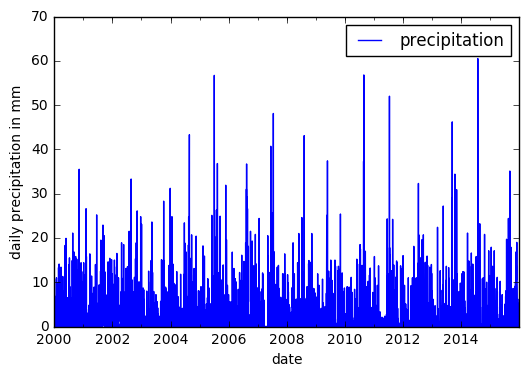

In [1]:
#libs
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#load and parse data from txt file downloaded with rainfall at Schiphol airport, downloaded from knmi.nl
names = ('station', 'date', 'precipitation')
format = '%Y%m%d'
df = pd.read_csv('KNMI_20161231.txt', delim_whitespace=False, names=names)
df['datetime'] = pd.to_datetime(df['date'], format=format)
df.index = df['datetime']
del df['datetime']
del df['station']
del df['date']

#gaafmaken
df.loc[df['precipitation']==-1,'precipitation'] = 0 #we assume that -1 (no data) means no rain.
df['precipitation'] = df['precipitation'] / 10  #in mm per day
#only use full years
df = df['2000':'2015']

#make a plot of precipitation
ax = df.plot(y='precipitation')
ax.set_xlabel('date')
ax.set_ylabel('daily precipitation in mm')
plt.savefig('precip.eps', bbox_inches='tight')



precipitation    0.8655
dtype: float64
beerPerYear    2120475.0
dtype: float64
beerPerYear    848.19
dtype: float64
beerPerPersonPerDay    8.367631
dtype: float64


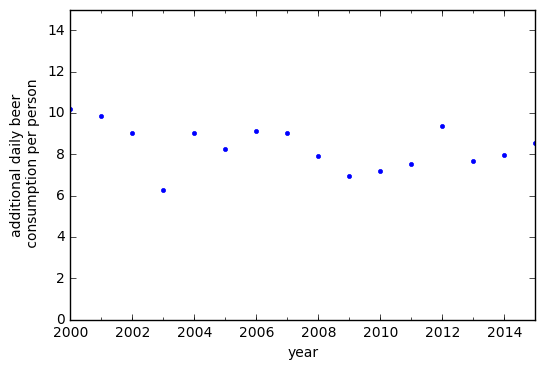

In [2]:
#How much beer?

#constants
roofArea = 24.5e6 #24.5 square kilometers of roofs
totalArea = 219.5e6 #219.5 square kilometers in the muncipallity of Amsterdam
beerEfficiency = 0.1 #efficiency of brewing process, from brewer Bart.

#2015 population statistics from statline.cbs.nl
totPop = 821752 
youthPop = 49366+40963+37138 #age groups 0-5, 5-10 and 10-15
adultPop = totPop - youthPop

#reference constants
OlympicSwimmingPoolVolume = 50 * 25 * 2 #in cubic meter, from https://en.wikipedia.org/wiki/Olympic-size_swimming_pool

#yearly water available for beer if everything is used.
yearlyPrecip = df.resample('A').sum()/1000 #in meters per year
yearlyBeer = yearlyPrecip  * roofArea * beerEfficiency #in cubic meters per year
yearlyBeer = yearlyBeer.rename(columns={'precipitation': 'beerPerYear'})
beerPerCapitaPerDay = 1000 * yearlyBeer / (365 * adultPop) #in liters per day, for each year
beerPerCapitaPerDay = beerPerCapitaPerDay.rename(columns={'beerPerYear': 'beerPerPersonPerDay'})

# Plot daily additional beer consumption per person
ax = beerPerCapitaPerDay.plot(style = '.', legend=False)
ax.set_xlabel('year')
ax.set_ylabel('additional daily beer\n consumption per person')
ax.set_ylim(0,15)
plt.savefig('dailyBeerPerPerson.eps')

#calculate statistics
print(yearlyPrecip.mean())
print(yearlyBeer.mean())
print(yearlyBeer.mean()/OlympicSwimmingPoolVolume)
print(beerPerCapitaPerDay.mean())



# conclusions on amount of beer
All the rain on roofs in Amsterdam can be converted into about 2 billion (2 with 9 zeros) liters of beer. This equals just over 850 olympic swimmimg pools of beer. If this beer was to be consumed by the population of amsterdam (aged 15+), everyone would have to drink (an additional) 8 liters of beer per person per day. 

In [3]:
#Economic impact

#comparing to other brewers
brewersCapacity = {'hemelswater': yearlyBeer.mean()}
brewersCapacity['Heineken'] = 10
#TODO add more brewers, make graph to show how big hemelswater would be.

#do more fun economic stuff: maybe what would happen to income of city if you had to pay for it? If it got exported?

# conclusions on economic impact
[FOOBAR TEXT]

In [4]:
#Sewer impact
#add text

#substract total water used for beer from precip, see what happens with maximum rainstorm, rain intensity distribution

# conclusions on rainwater sewer impact
[foobar text]

In [5]:
#healt impact

#amount of glasses per day. Look at death by Alcohol vs alcohol consumption? See how it changes? 


# conclusions on health impact
[foobar text]